In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv("train.csv")
print(dataset.head())

         UID                ph_no    cvv  credit_card_number  \
0  T77962103           7059868985  673.0        2.131868e+14   
1  O92591533  +1-288-810-2425x013  983.0        4.820055e+15   
2  O31883571    791.502.4387x7276  855.0        4.031429e+15   
3  M18080565           2522308761  806.0        3.036423e+13   
4  Q74073854     683-521-2001x423  424.0        4.610207e+15   

                             job                      email  \
0                           Copy  guerrerodavid@example.org   
1  Interior and spatial designer     michaela47@example.org   
2       Scientist, water quality       zhoffman@example.org   
3                   Toxicologist         hprice@example.net   
4              Software engineer      michael61@example.net   

                         url                country  emoji             name  \
0         http://garcia.org/                  Gabon      📑     Cathy Cherry   
1          http://ortiz.com/                Bermuda     🥷🏿    Austin Graham   

In [3]:
dataset = dataset.drop(["UID","ph_no","job","UZRdX","Bz7Ov","country","cvv","credit_card_number","email","url","emoji","name"],axis =1)

In [4]:
def clean_columns(dataset):
    for column in dataset.columns[:-1]:
        dataset[column] = dataset[column].str.extract(r'(\-?\d+\.\d+)').astype(float)

In [5]:
clean_columns(dataset)

In [6]:
def correlation(dataset, threshold):
  col_cor = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_cor.add(colname)
  return col_cor

In [7]:
corr_features = correlation(dataset.drop(['state'], axis = 1), 0.7)

In [8]:
dataset = dataset.drop(corr_features,axis = 1)

In [9]:
for column in dataset.columns[:-1]:
    column_mean = dataset[column].mean()
    dataset[column].fillna(column_mean, inplace=True)

In [10]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
print(y)

[2 9 7 ... 7 4 9]


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,0:] = sc.fit_transform(x_train[:,0:])
x_test[:,0:] = sc.transform(x_test[:,0:])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.05992857142857143 at K = 32


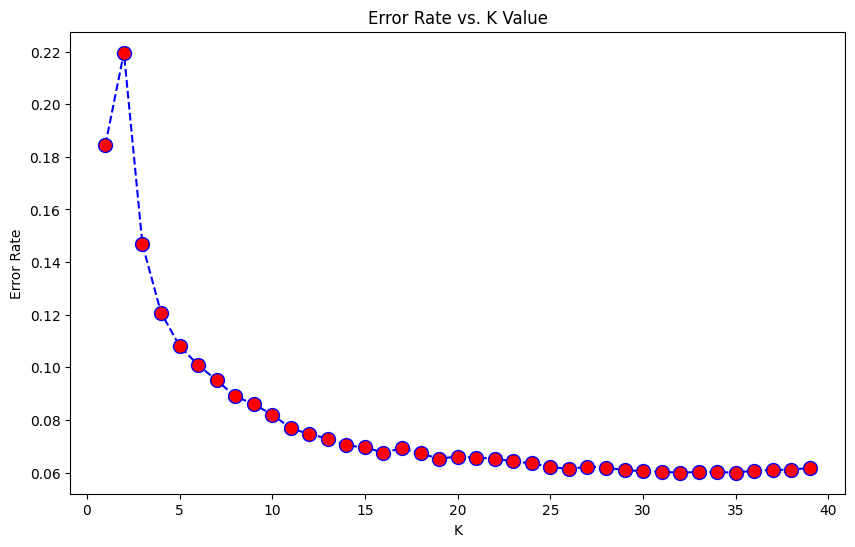

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [18]:
classifier = KNeighborsClassifier(
    n_neighbors=32 ,metric="minkowski", p=2
)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(acc)
print(cm)

0.9400714285714286
[[1307    8   12    7   11    2    6    7   11    7]
 [  12 1341    9    6    3    4    7    9    6    6]
 [  12   14 1260   10   12   10    3    8    4    6]
 [  12   12   16 1292   10    5    7    5   11    7]
 [   5    8   12   13 1388    7    7    1    6    5]
 [  12   14   10   14   10 1306    2   11    4    5]
 [  22   29   28   12    6   17 1323    7   10    7]
 [  20   10   10   11    9    3   13 1279    6    4]
 [   8   16    7   12   10    9    7   11 1327    5]
 [  17    5   12    6    7   13    2   12   13 1338]]


In [21]:
import joblib

model = classifier


joblib.dump(model, 'MIC_KNN.pkl')


['MIC_KNN.pkl']

In [22]:
test_dataset = pd.read_csv("test.csv")
print(test_dataset.head())

         UID                  ph_no     cvv  credit_card_number  \
0  675919160  001-869-364-3240x1461   632.0        4.787566e+12   
1  V09461652    +1-573-696-9623x435   548.0        4.804074e+15   
2  S75396644   001-755-901-1494x000   808.0        4.890170e+15   
3  598599835      (625)805-7487x931  9468.0        5.428366e+15   
4  W60397022     556-206-9662x97397   647.0        2.131239e+14   

                                     job                         email  \
0            Scientist, research (maths)  lawrencereginald@example.org   
1       Higher education careers adviser        jennifer41@example.org   
2                            Illustrator      valdezsheryl@example.net   
3                 Audiological scientist                           NaN   
4  Development worker, international aid    jefferyrussell@example.org   

                    url                           country  emoji  \
0    http://walker.org/                          Honduras  🧜🏻‍♀️   
1      http://sh

In [23]:
test_dataset = test_dataset.drop(["UID","ph_no","job","UZRdX","Bz7Ov","country","cvv","credit_card_number","email","url","emoji","name"],axis =1)

In [24]:
def clean_columns_new(dataset):
    for column in dataset.columns[0:]:
        dataset[column] = dataset[column].str.extract(r'(\-?\d+\.\d+)').astype(float)

In [25]:
clean_columns_new(test_dataset)

In [26]:
test_dataset = test_dataset.drop(corr_features,axis = 1)

In [27]:
for column in test_dataset.columns[0:]:
    column_mean = test_dataset[column].mean()
    test_dataset[column].fillna(column_mean, inplace=True)

In [28]:
x_test_new = test_dataset.iloc[:,0:].values


In [29]:
x_test_new[:,0:] = sc.transform(x_test_new[:,0:])

In [31]:
y_test_pred = classifier.predict(x_test_new)


In [33]:
predicted_original = le.inverse_transform(y_test_pred)

In [35]:
submission_dataset = pd.read_csv("test.csv")

In [36]:
result_df = pd.DataFrame({'UID': submission_dataset['UID'], 'state': predicted_original})


result_df.to_csv('MIC_submission_updated_3.csv', index=False)